In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
uploaded_file = 'merged_data.csv'
data = pd.read_csv(uploaded_file)

Q1

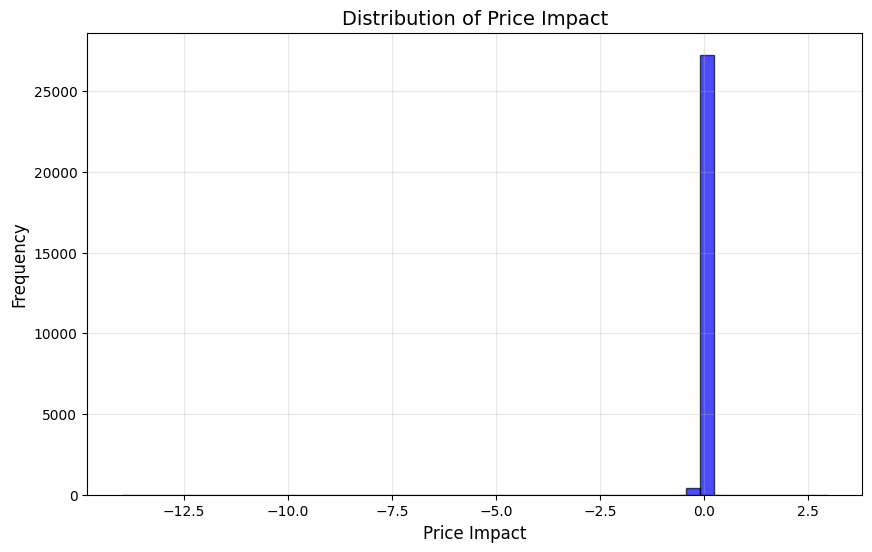

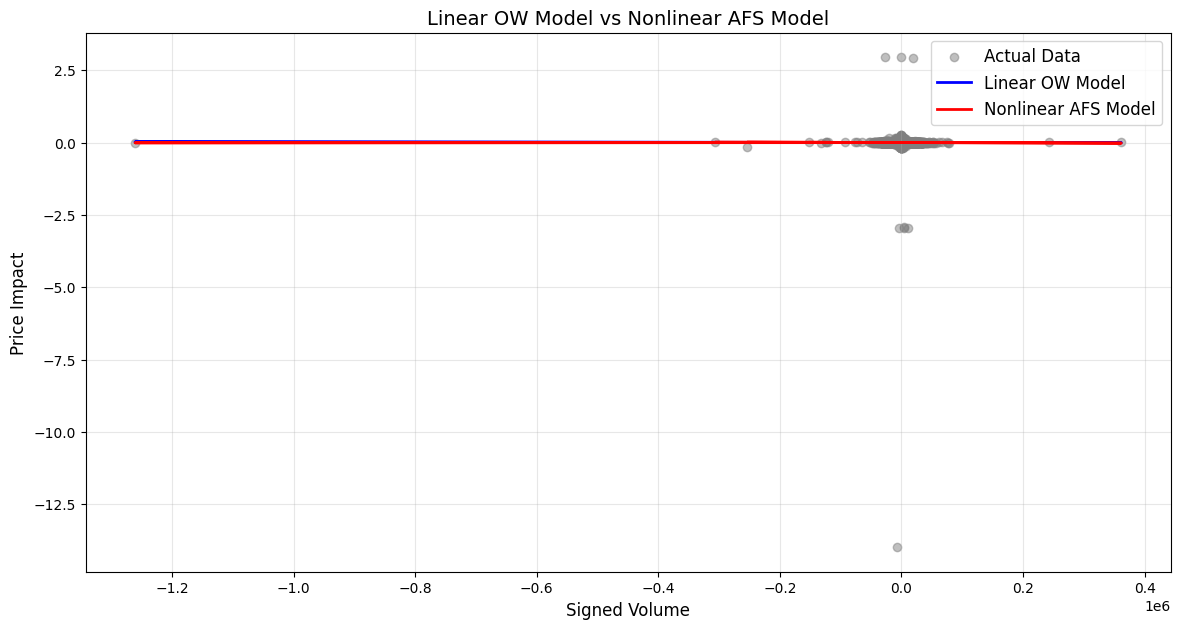

In [ ]:
# Calculate price impact
data['price_impact'] = data['price'] - data['mid_price']

# Visualize distribution of price impact
plt.figure(figsize=(10, 6))
plt.hist(data['price_impact'], bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Price Impact', fontsize=14)
plt.xlabel('Price Impact', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Linear OW Model
X = data['Signed Volume'].values.reshape(-1, 1)
y = data['price_impact'].values
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_price_impact = linear_model.predict(X)

# Nonlinear AFS Model (polynomial degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
nonlinear_model = LinearRegression()
nonlinear_model.fit(X_poly, y)
nonlinear_price_impact = nonlinear_model.predict(X_poly)

# Visualization
plt.figure(figsize=(14, 7))
plt.scatter(data['Signed Volume'], data['price_impact'], alpha=0.5, label='Actual Data', color='gray')
plt.plot(data['Signed Volume'], linear_price_impact, color='blue', linewidth=2, label='Linear OW Model')
plt.plot(data['Signed Volume'], nonlinear_price_impact, color='red', linewidth=2, label='Nonlinear AFS Model')
plt.title('Linear OW Model vs Nonlinear AFS Model', fontsize=14)
plt.xlabel('Signed Volume', fontsize=12)
plt.ylabel('Price Impact', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


Q2

In [ ]:
# Extract relevant columns
Q = data['Signed Volume'].values
J = data['mid_price'].diff().fillna(0).values

# Define constants
beta = 0.2
gamma = 1.0
p_plus_1 = 1

# Calculate PnL_LM (C.7 in the paper)
PnL_LM = np.sum(Q[:-1] * J[1:] - beta * np.abs(Q[:-1])**p_plus_1)

# Calculate R_M (C.8 in the paper)
R_M = np.sum((gamma / 2) * Q[:-1]**2)

# Compute Sharpe Ratio (C.13 in the paper)
Sharpe_Ratio = PnL_LM / R_M

# Output the results
print(f"PnL_LM: {PnL_LM}")
print(f"R_M: {R_M}")
print(f"Sharpe Ratio: {Sharpe_Ratio}")


PnL_LM: -22104934.96499997
R_M: 1605921120338.5
Sharpe Ratio: -1.3764645526512932e-05


Q3

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 2/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 3/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 6/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 7/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 8/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 9/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093 

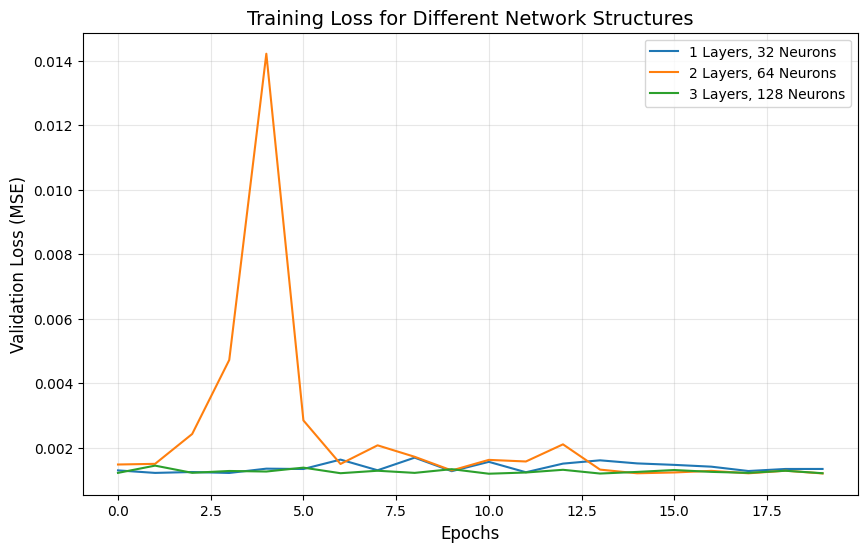

In [ ]:
# Prepare data for deep learning
data['price_impact'] = data['price'] - data['mid_price']
X = data[['Signed Volume', 'mid_price']].values
y = data['price_impact'].values

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define deep learning models with different structures
def create_model(layers, neurons, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))  # Output layer
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# Train models with different configurations
configurations = [(1, 32), (2, 64), (3, 128)]  # (number of layers, neurons per layer)
history_results = {}

for layers, neurons in configurations:
    model = create_model(layers, neurons)
    history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)
    history_results[f"{layers} Layers, {neurons} Neurons"] = history.history['val_loss']

# Visualize training loss
plt.figure(figsize=(10, 6))
for config, val_loss in history_results.items():
    plt.plot(val_loss, label=config)
plt.title('Training Loss for Different Network Structures', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Validation Loss (MSE)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()
